<a href="https://colab.research.google.com/github/eyad718/T5-project/blob/main/project%20MVP%20T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries.

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np
import pandas as pd

Upload the Dataset to colab

In [128]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (2).csv


Read the Dataset

In [129]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [130]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# ***Cleaning the data***

Check the null values

In [131]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Fill the null values in BMI with the BMI median

In [132]:
df['bmi']=df.bmi.fillna(df.bmi.median())

In [133]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Check each feature values

In [134]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [135]:
df[df.gender=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


I will drop the other gender from the data frame beacuse there is only one data

In [136]:
df=df.drop([df[df.gender=='Other'].index][0],axis=0)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [137]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [138]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [139]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [140]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [141]:
len(df[df.smoking_status=='Unknown'])

1544

From the dataset information the unknown means that the patient didn’t  provide the information.

# ***Exploratory Data Analysis***

In [142]:
x = pd.DataFrame( df.groupby(['stroke'])['stroke'].count())


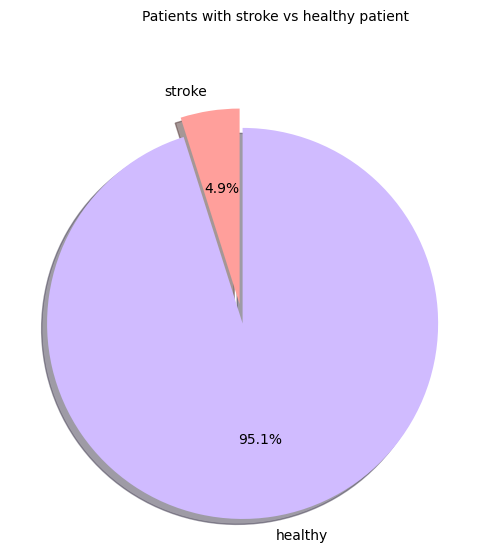

In [143]:
labels_never = 'stroke', 'healthy'
sizes_never = [x.stroke[1], x.stroke[0]]
colors = sns.color_palette('pastel')[3:5]
explode_never = (0, 0.10)
fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_never, explode=explode_never, labels=labels_never,colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-0.5,1.45, 'Patients with stroke vs healthy patient')

plt.show()


Every 100 person we get around 5 people that have stroke which means the dataset is imbalanced  



## ***Does the Gender imacpt on strokes?***

In [144]:
stroke_gender = df[df['stroke'] == 1]['gender'].value_counts()
healthy_gender = df[df['stroke'] == 0]['gender'].value_counts()

female = df['gender'].value_counts().values[0]
male =  df['gender'].value_counts().values[1]

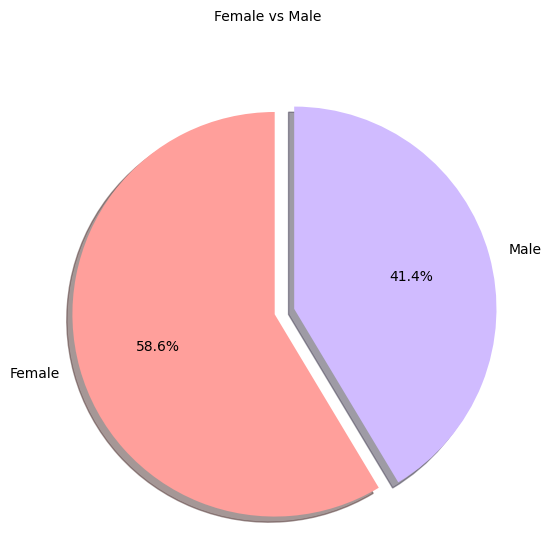

In [145]:
labels_never = 'Female', 'Male'
sizes_never = [female, male]
colors = sns.color_palette('pastel')[3:5]
explode_never = (0, 0.10)
fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_never, explode=explode_never, labels=labels_never,colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-0.3,1.45, 'Female vs Male')

plt.show()


In [146]:
stroke_female = stroke_gender.values[0]
stroke_male = stroke_gender.values[1]
healthy_female = healthy_gender.values[0]
healthy_male = healthy_gender.values[1]

In [147]:
stroke_gender

Female    141
Male      108
Name: gender, dtype: int64

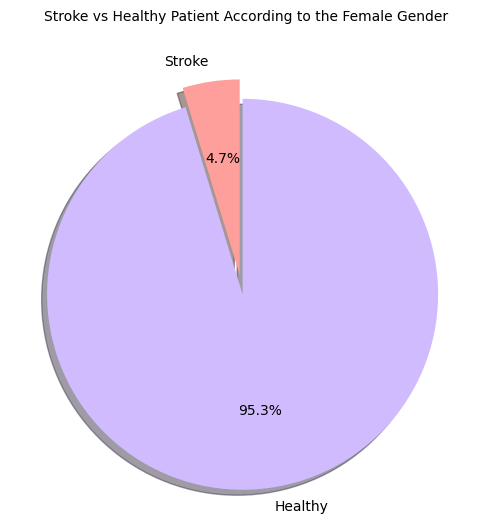

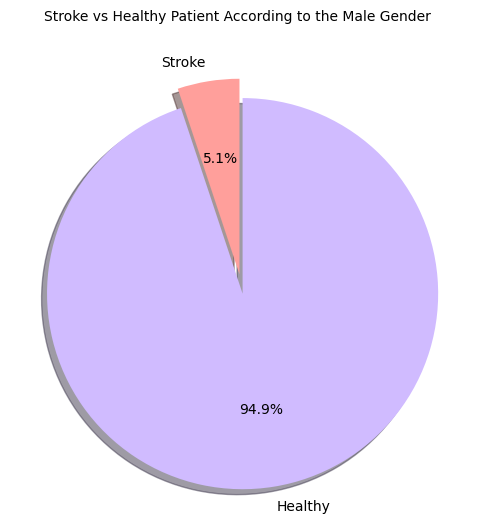

In [148]:
labels_Gender = 'Stroke', 'Healthy'
sizes_Gender = [stroke_female, healthy_female]
colors = sns.color_palette('pastel')[3:5]
explode = (0, 0.10)
fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_Gender, explode=explode, labels=labels_Gender,colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-1,1.3, 'Stroke vs Healthy Patient According to the Female Gender')

plt.show()
labels_Gender1 = 'Stroke', 'Healthy'
sizes_Gender1 = [stroke_male, healthy_male]
colors = sns.color_palette('pastel')[3:5]
explode = (0, 0.10)
fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_Gender1, explode=explode, labels=labels_Gender1,colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-1,1.3, 'Stroke vs Healthy Patient According to the Male Gender')

plt.show()


It's cleary that gender doesn't effect  the chance of getting stroke

## ***Does the hypertension imacpt on strokes?***

In [149]:
stroke_hypertension = df[df['stroke'] == 1]['hypertension'].value_counts()
healthy_hypertension = df[df['stroke'] == 0]['hypertension'].value_counts()



stroke_no_hypertension = stroke_hypertension.values[0]
stroke_yes_hypertension =  stroke_hypertension.values[1]
healthy_no_hypertension = healthy_hypertension.values[0]
healthy_yes_hypertension = healthy_hypertension.values[1]



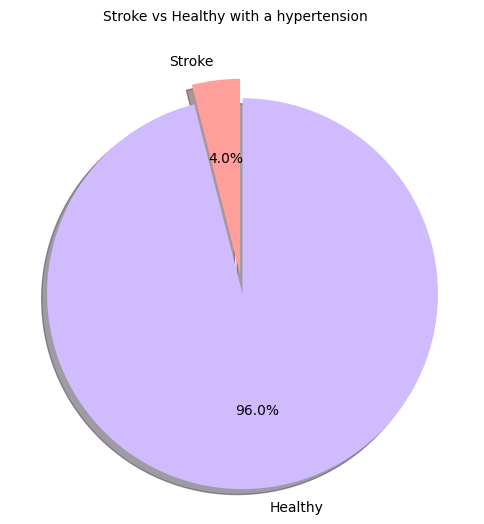

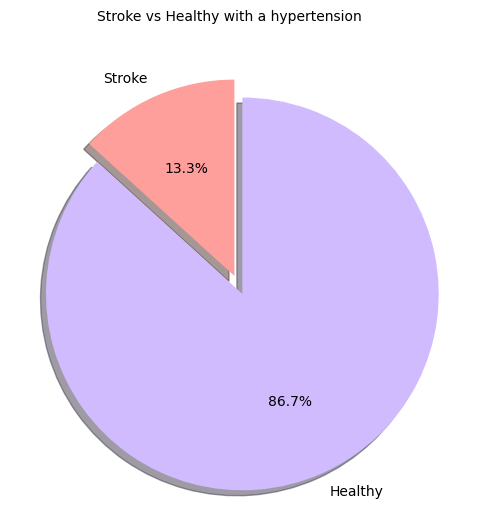

In [150]:
labels_hypertension = 'Stroke', 'Healthy'
sizes_hypertension = [stroke_no_hypertension, healthy_no_hypertension]
colors = sns.color_palette('pastel')[3:5]
explode = (0, 0.10)
fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_hypertension, explode=explode, labels=labels_hypertension,colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-0.7,1.3, 'Stroke vs Healthy with a hypertension')
plt.show()

labels_hypertension1 = 'Stroke', 'Healthy'
sizes_hypertension1 = [stroke_yes_hypertension, healthy_yes_hypertension]
colors = sns.color_palette('pastel')[3:5]
explode = (0, 0.10)
fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_hypertension1, explode=explode, labels=labels_hypertension1,colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-0.7,1.3, 'Stroke vs Healthy with a hypertension')

plt.show()


Patients with hypertension have 9.3% higher chance to have stroke than healthy patients 

## ***Does the heart diseases imacpt on strokes?`***

In [151]:
stroke_heart_disease = df[df['stroke'] == 1]['heart_disease'].value_counts()
healthy_heart_disease = df[df['stroke'] == 0]['heart_disease'].value_counts()

stroke_no_heart_disease = stroke_heart_disease.values[0]
stroke_yes_heart_disease = stroke_heart_disease.values[1]
healthy_no_heart_disease = healthy_heart_disease.values[0]
healthy_yes_heart_disease = healthy_heart_disease.values[1]

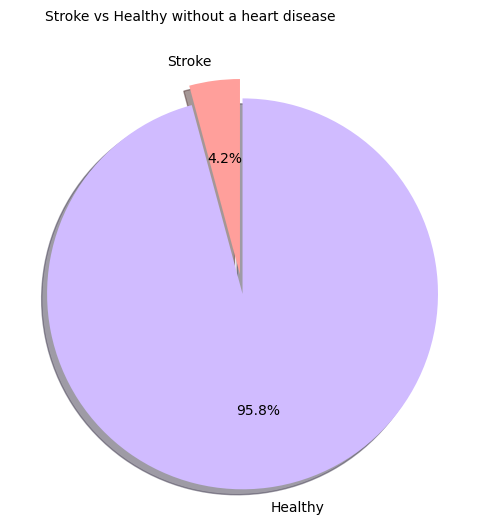

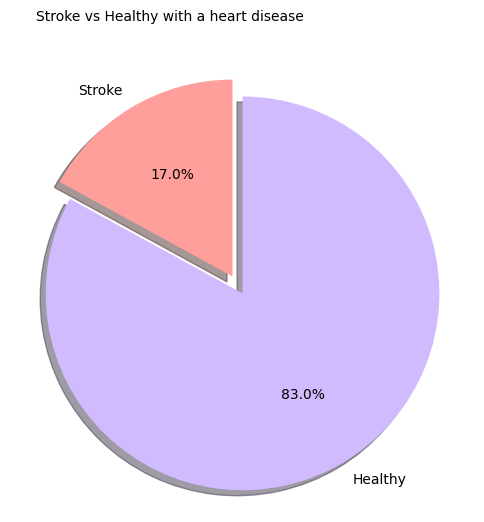

In [152]:
labels_yes_heart_disease = 'Stroke', 'Healthy'
sizes_yes_heart_disease = [stroke_no_heart_disease, healthy_no_heart_disease]
colors = sns.color_palette('pastel')[3:5]
explode = (0, 0.10)
fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_yes_heart_disease, explode=explode, labels=labels_yes_heart_disease,colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-1,1.3, 'Stroke vs Healthy without a heart disease')
plt.show()

labels_yes_heart_disease1 = 'Stroke', 'Healthy'
sizes_yes_heart_disease1 = [stroke_yes_heart_disease, healthy_yes_heart_disease]
colors = sns.color_palette('pastel')[3:5]
explode = (0, 0.10)
fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_yes_heart_disease1, explode=explode, labels=labels_yes_heart_disease1,colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-1,1.3, 'Stroke vs Healthy with a heart disease')

plt.show()


Patients with a heart disease have 12.8% higher chance to have stroke than healthy patients 

## ***Does the marriage imacpt on strokes?***

In [153]:
stroke_ever_married = df[df['stroke'] == 1]['ever_married'].value_counts()
healthy_ever_married = df[df['stroke'] == 0]['ever_married'].value_counts()

stroke_no_ever_married = stroke_ever_married.values[1]
stroke_yes_ever_married = stroke_ever_married.values[0]
healthy_no_ever_married = healthy_ever_married.values[1]
healthy_yes_ever_married = healthy_ever_married.values[0]


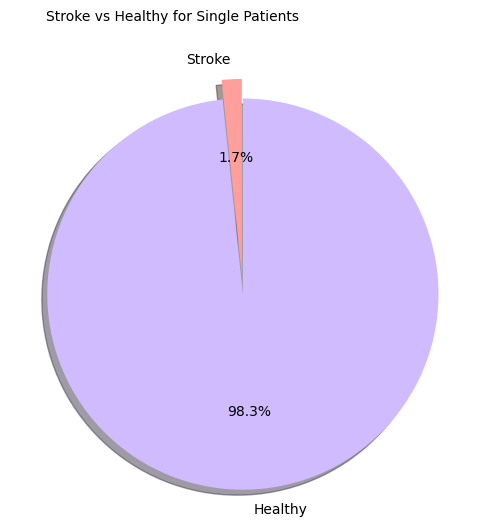

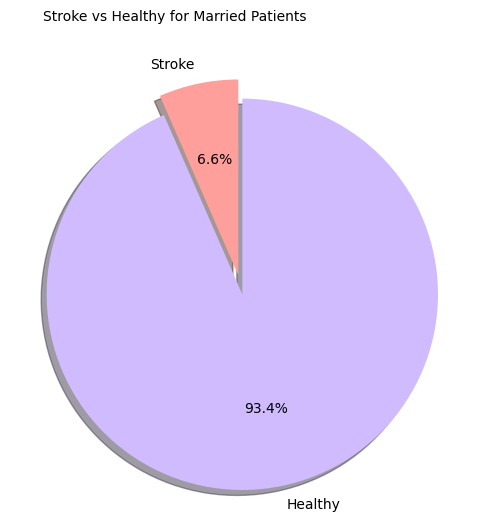

In [154]:
labels_yes_ever_married = 'Stroke', 'Healthy'
sizes_yes_ever_married = [stroke_no_ever_married, healthy_no_ever_married]
colors = sns.color_palette('pastel')[3:5]
explode = (0, 0.10)
fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_yes_ever_married, explode=explode, labels=labels_yes_ever_married,colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-1,1.3, 'Stroke vs Healthy for Single Patients')
plt.show()

labels_yes_ever_married1 = 'Stroke', 'Healthy'
sizes_yes_ever_married1 = [stroke_yes_ever_married, healthy_yes_ever_married]
colors = sns.color_palette('pastel')[3:5]
explode = (0, 0.10)
fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_yes_ever_married1, explode=explode, labels=labels_yes_ever_married1,colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-1,1.3, 'Stroke vs Healthy for Married Patients')

plt.show()


Patients whose ever married have 4.9% higher chance to have stroke than Patients whose never been married

## ***Does the Residence type imacpt on strokes?***

In [155]:
stroke_home = df[df['stroke'] == 1]['Residence_type'].value_counts()
healthy_home= df[df['stroke'] == 0]['Residence_type'].value_counts()

stroke_urban = stroke_home.values[0]
stroke_rural= stroke_home.values[1]
healthy_urban = healthy_home.values[0]
healthy_rural = healthy_home.values[1]

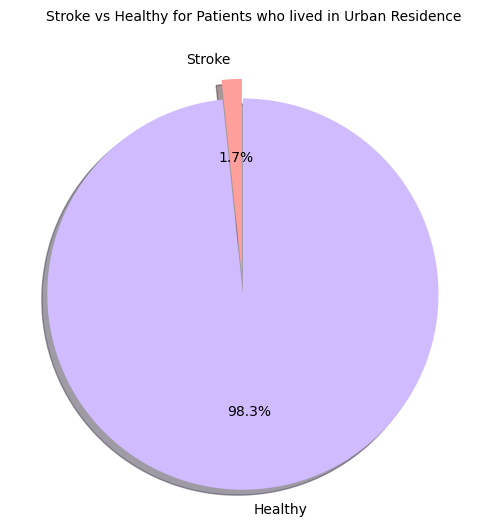

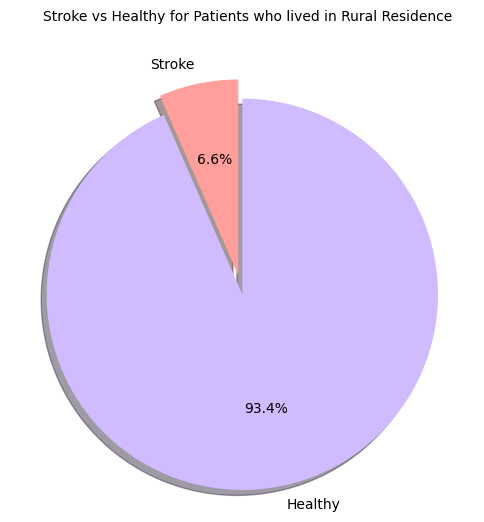

In [156]:
labels_yes_Residence_type = 'Stroke', 'Healthy'
sizes_yes_Residence_type = [stroke_urban, healthy_urban]
colors = sns.color_palette('pastel')[3:5]
explode = (0, 0.10)
fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_yes_ever_married, explode=explode, labels=labels_yes_ever_married,colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-1,1.3, 'Stroke vs Healthy for Patients who lived in Urban Residence')
plt.show()

labels_yes_Residence_type1 = 'Stroke', 'Healthy'
sizes_yes_Residence_type1 = [stroke_rural, healthy_rural]
colors = sns.color_palette('pastel')[3:5]
explode = (0, 0.10)
fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_yes_ever_married1, explode=explode, labels=labels_yes_ever_married1,colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-1,1.3, 'Stroke vs Healthy for Patients who lived in Rural Residence')

plt.show()


Patients whose lived in a rural residences has an higher probability to get a stroke

## ***Does the smoking imacpt on strokes?***

In [157]:
smoke = df['smoking_status'].value_counts()
stroke_smoke = df[df['stroke'] == 1]['smoking_status'].value_counts()
healthy_smoke = df[df['stroke'] == 0]['smoking_status'].value_counts()

never = smoke.values[0]
unknown =  smoke.values[1]
former = smoke.values[2]
smokes = smoke.values[3]

stroke_never = stroke_smoke.values[0]
stroke_unknown = stroke_smoke.values[2]
stroke_former = stroke_smoke.values[1]
stroke_smokes = stroke_smoke.values[3]

healthy_never = healthy_smoke.values[0]
healthy_unknown = healthy_smoke.values[1]
healthy_former = healthy_smoke.values[2]
healthy_smokes = healthy_smoke.values[3]


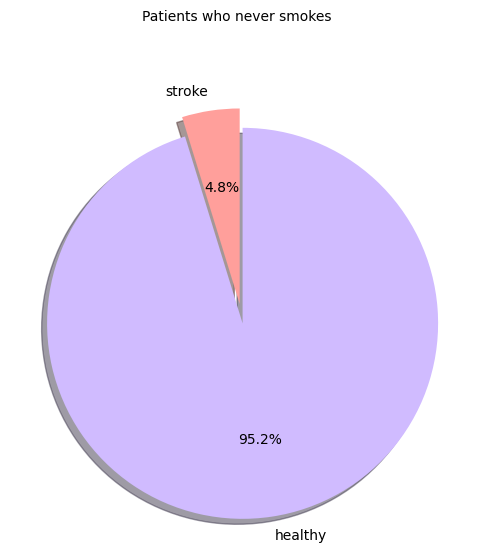

In [158]:
labels_never = 'stroke', 'healthy'
sizes_never = [stroke_never, healthy_never]
colors = sns.color_palette('pastel')[3:5]
explode_never = (0, 0.10)
fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_never, explode=explode_never, labels=labels_never,colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-0.5,1.45, 'Patients who never smokes')

plt.show()


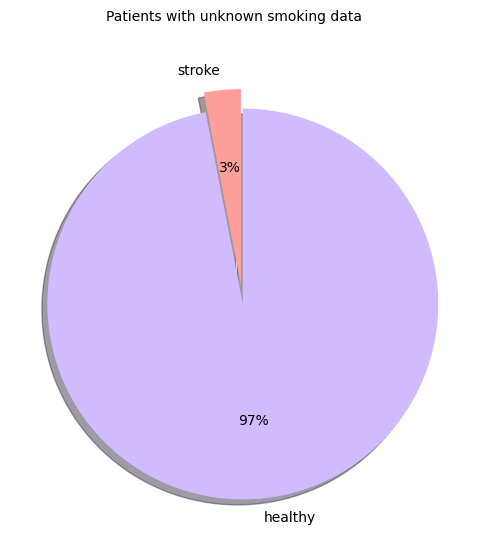

In [159]:
labels_unknown = 'stroke', 'healthy'
sizes_unknown = [stroke_unknown, healthy_unknown]
explode_unknown = (0.1, 0)
colors = sns.color_palette('pastel')[3:5]

fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_unknown, explode=explode_unknown, labels=labels_unknown,colors = colors, autopct='%.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-0.7,1.45, 'Patients with unknown smoking data')

plt.show()


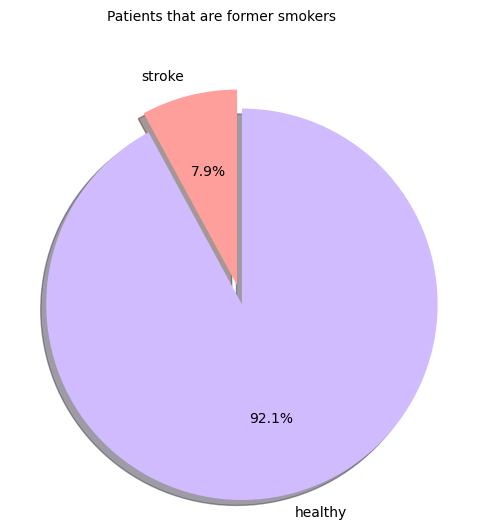

In [160]:
labels_former = 'stroke', 'healthy'
sizes_former = [stroke_former, healthy_former]
explode_former = (0.1, 0)
colors = sns.color_palette('pastel')[3:5]

fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_former, explode=explode_former, labels=labels_former,colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-0.69,1.45, 'Patients that are former smokers')

plt.show()


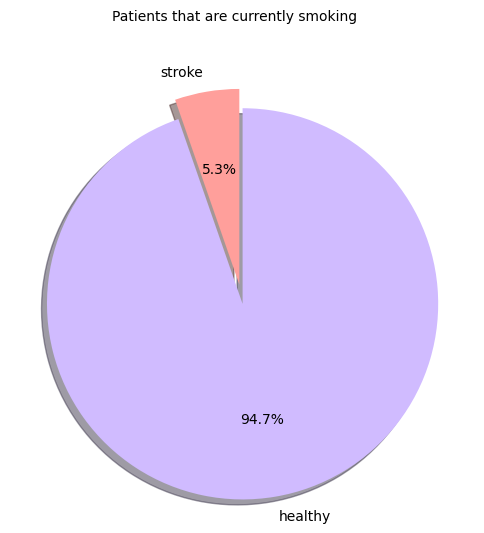

In [161]:
labels_smokes = 'stroke', 'healthy'
sizes_smokes = [stroke_smokes, healthy_smokes]
explode_smokes = (0.1, 0)
colors = sns.color_palette('pastel')[3:5]

fig1, ax1 = plt.subplots(figsize = (6,6), dpi = 100)
ax1.pie(sizes_smokes, explode=explode_smokes, labels=labels_smokes,colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(-0.67,1.45, 'Patients that are currently smoking')

plt.show()


Smokers and non smokers patients have an equal  probability to get a stroke while  former smokers have the highest chance to get a stroke.

## ***Does the age imacpt on strokes?***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'relationship between age and stroke')

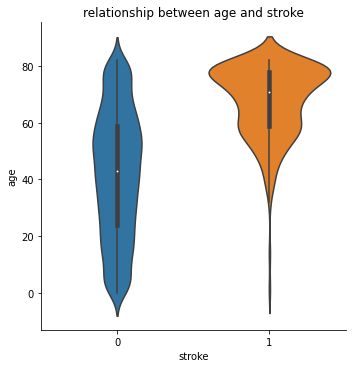

In [162]:
sns.catplot('stroke','age',data=df,kind='violin')
plt.title('relationship between age and stroke')

Cleary the patients whoes above the age of 40 are getting  more strokes than young patients.

# ***Machine learning*** 

## ***Categorical Data***

Make every non numerical value  to a numerical value.

In [163]:
gender1 = pd.get_dummies(df["gender"],drop_first=True)
gender1

,Male
0,1
1,0
2,1
3,0
4,0
...,...
5105,0
5106,0
5107,0
5108,1


In [164]:
ever_married1 = pd.get_dummies(df["ever_married"],drop_first=True)
ever_married1

,Yes
0,1
1,1
2,1
3,1
4,1
...,...
5105,1
5106,1
5107,1
5108,1


In [165]:
work_type1 = pd.get_dummies(df["work_type"])
work_type1

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5105,0,0,1,0,0
5106,0,0,0,1,0
5107,0,0,0,1,0
5108,0,0,1,0,0


In [166]:
Residence_type1 = pd.get_dummies(df["Residence_type"],drop_first=True)
Residence_type1

,Urban
0,1
1,0
2,0
3,1
4,0
...,...
5105,1
5106,1
5107,0
5108,0


In [167]:
smoking_status1 = pd.get_dummies(df["smoking_status"])
smoking_status1

,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [168]:
df1 = df

In [169]:
df2 = pd.concat([df1,smoking_status1,Residence_type1,work_type1,ever_married1,gender1],axis=1)

In [170]:
df2


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Unknown,formerly smoked,never smoked,smokes,Urban,Govt_job,Never_worked,Private,Self-employed,children,Yes,Male
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1,0,0,1,0,0,1,0,0,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,0,0,1,0,0,0,0,0,1,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,0,1,0,0,0,0,1,0,0,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,0,0,1,1,0,0,1,0,0,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0,0,0,1,0,1,0,0,1,0,0,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0,0,1,0,1,0,0,0,1,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,0,1,0,0,0,0,0,1,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0,1,0,0,0,0,0,1,0,0,1,1


In [171]:
df2.drop(['smoking_status','gender','ever_married','work_type','Residence_type'],axis= 1, inplace= True)

In [172]:
df2

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Unknown,formerly smoked,never smoked,smokes,Urban,Govt_job,Never_worked,Private,Self-employed,children,Yes,Male
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,1,1
1,51676,61.0,0,0,202.21,28.1,1,0,0,1,0,0,0,0,0,1,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0,0,1,1
3,60182,49.0,0,0,171.23,34.4,1,0,0,0,1,1,0,0,1,0,0,1,0
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0,0,0,1,0,1,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,0,0,1,0,1,0,0,0,1,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,0,0,1,0,0,0,0,0,1,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,0,1,0,0,0,0,0,1,0,0,1,1
